In [130]:
#Парадокс дней рождений
#В классе 23 человека, вероятность совпадения др у двух людей далеко не 1/365

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm #для прогресс бара
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 17,8 #график выйдет за рамки - shift+o

In [114]:
student_count = 23
ex_count = 10**4
bd_list = []

for _ in tqdm(range(ex_count)):
    classroom = list(np.random.randint(0,365, size = student_count))
    bd_list.append(len(classroom) != len(set(classroom))) #хотя бы у одной пары совпало
    
pd.Series(bd_list).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

0.5007

In [136]:
#график верятности совпадения др хотя бы у одной пары при увеличении людей от 2 до 100
prob_list = []

for class_size in tqdm(range(2,101)):
    bd2_list = []
    for __ in range(10**4):
        classroom = list(np.random.randint(0,365, size = class_size))
        bd2_list.append((len(classroom) - len(set(classroom))) >=1 )
    prob_list.append(pd.Series(bd2_list).mean())

  0%|          | 0/99 [00:00<?, ?it/s]

<AxesSubplot:>

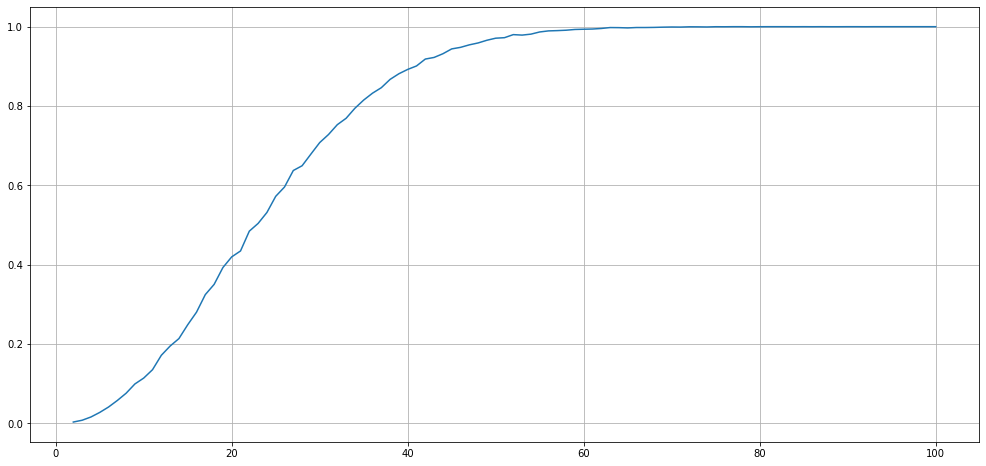

In [137]:
pd.Series(prob_list, index = range(2,101)).plot(grid = True)

In [110]:
#а теперь тот же график, но с увеличением требуемого минимального количества совпадений от 1 до 10

dict_prob = {} #для дальнейшего создания датафрейма из него

for req_cons in tqdm(range(1,11)):
    prob_list = [] #список для вероятностей (частот) для каждого требуемого числа совпадений
    
    for class_size in range(2,101):
        bd2_list = [] #список для совпадений дней рождений
        
        #собственно определение частоты совпадений на основе генерации большого количества классов учеников
        for __ in range(10**4):
            classroom = list(np.random.randint(0,365, size = class_size))
            bd2_list.append((len(classroom) - len(set(classroom))) >= req_cons )
            
        prob_list.append(pd.Series(bd2_list).mean())
    
    dict_prob[req_cons] = prob_list
    

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='class_size'>

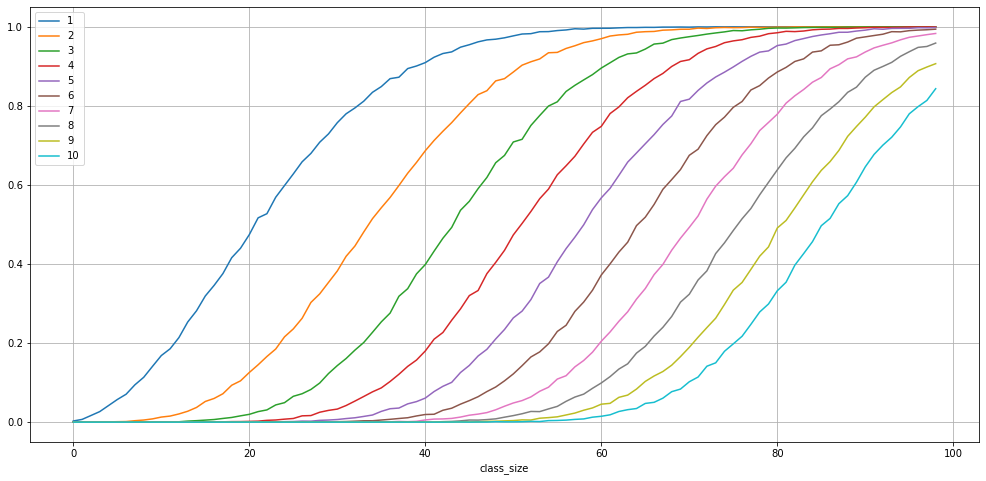

In [132]:
pd.DataFrame(dict_prob).plot(grid = True, xlabel = 'class_size')

In [138]:
#то же самое, но проверерка выполняется не на минимальное количество совпадений др (не менее 1, 2 и тп)
#а на точное совпадение

dict_prob = {} #для дальнейшего создания датафрейма из него

for req_cons in tqdm(range(1,11)):
    prob_list = [] #список для вероятностей (частот) для каждого требуемого числа совпадений
    
    for class_size in range(2,101):
        bd2_list = [] #список для совпадений дней рождений
        
        #собственно определение частоты совпадений на основе генерации большого количества классов учеников
        for __ in range(10**4):
            classroom = list(np.random.randint(0,365, size = class_size))
            bd2_list.append((len(classroom) - len(set(classroom))) == req_cons )
            
        prob_list.append(pd.Series(bd2_list).mean())
    
    dict_prob[req_cons] = prob_list
    

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='class_size'>

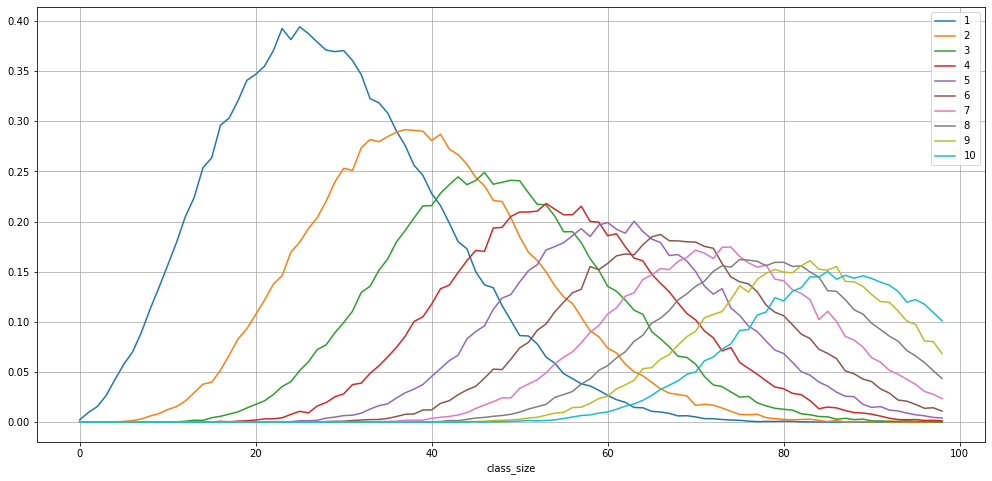

In [139]:
pd.DataFrame(dict_prob).plot(grid = True, xlabel = 'class_size')

In [105]:
conda install -c conda-forge tqdm

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
